<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0711_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, Dropout,Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences

# 워드임베딩

In [24]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=30000)

In [25]:
xseq_train=pad_sequences(x_train,maxlen=150)
xseq_test=pad_sequences(x_test,maxlen=150)

In [26]:
xseq_train.shape

(25000, 150)

In [27]:
x_train.shape

(25000,)

In [29]:
em=Embedding(30000,16,input_length=150)
model=keras.Sequential()
model.add(em)
model.add(LSTM(20))
model.add(Dropout(20,activation=''))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 16)           480000    
                                                                 
 lstm_1 (LSTM)               (None, 20)                2960      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 482,981
Trainable params: 482,981
Non-trainable params: 0
_________________________________________________________________


In [31]:
es=keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
hist=model.fit(xseq_train, y_train,callbacks=[es],validation_split=0.2,epochs=50)

Epoch 1/50
625/625 [==============================] - 39s 59ms/step - loss: 0.4771 - accuracy: 0.7585 - val_loss: 0.3225 - val_accuracy: 0.8652
Epoch 2/50
625/625 [==============================] - 40s 64ms/step - loss: 0.2755 - accuracy: 0.8886 - val_loss: 0.3084 - val_accuracy: 0.8694
Epoch 3/50
625/625 [==============================] - 38s 61ms/step - loss: 0.2182 - accuracy: 0.9171 - val_loss: 0.3289 - val_accuracy: 0.8730
Epoch 4/50
625/625 [==============================] - 36s 58ms/step - loss: 0.1831 - accuracy: 0.9330 - val_loss: 0.3077 - val_accuracy: 0.8748
Epoch 5/50
625/625 [==============================] - 37s 59ms/step - loss: 0.1569 - accuracy: 0.9436 - val_loss: 0.3781 - val_accuracy: 0.8622
Epoch 6/50
625/625 [==============================] - 37s 58ms/step - loss: 0.1372 - accuracy: 0.9535 - val_loss: 0.3790 - val_accuracy: 0.8640
Epoch 7/50
625/625 [==============================] - 35s 55ms/step - loss: 0.1229 - accuracy: 0.9579 - val_loss: 0.3550 - val_accuracy:

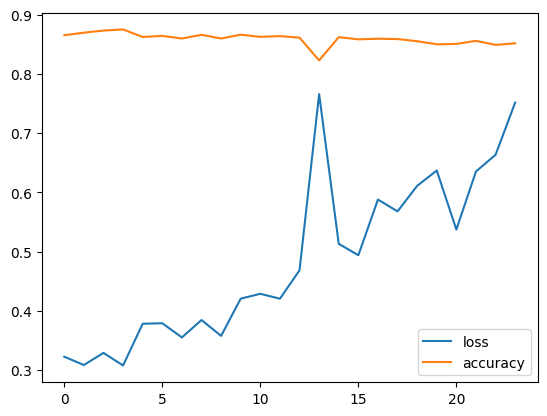

In [37]:
plt.plot(hist.history['val_loss'],label='loss')
plt.plot(hist.history['val_accuracy'],label='accuracy')
plt.legend()
plt.show()

In [38]:
path='/content/drive/MyDrive/python_basic/data/iap.csv'

In [42]:
df=pd.read_csv(path,header=None)
df

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [43]:
df.columns=['date','passenger']

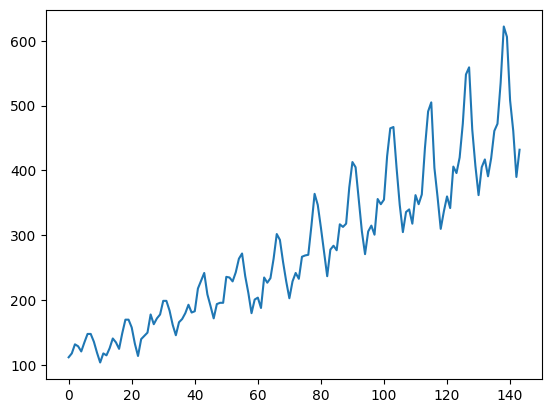

In [46]:
plt.plot(df['passenger'])
plt.show()

In [56]:
x=[]
y=[]
src=df['passenger']
n=len(src)

for i in range(n-12):
    x.append(src[i:i+12])
    y.append(src[i+12])


In [57]:
x=np.array(x)
y=np.array(y)

In [58]:
x.shape,y.shape

((132, 12), (132,))

In [60]:
x

array([[112, 118, 132, ..., 119, 104, 118],
       [118, 132, 129, ..., 104, 118, 115],
       [132, 129, 121, ..., 118, 115, 126],
       ...,
       [407, 362, 405, ..., 622, 606, 508],
       [362, 405, 417, ..., 606, 508, 461],
       [405, 417, 391, ..., 508, 461, 390]])

In [59]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [64]:
x_train.shape,y_train.shape

((99, 12), (99,))

In [82]:
model=keras.Sequential()
model.add(Input(shape=(12,1)))
model.add(LSTM(10))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10)                480       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [89]:
es=keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
hist=model.fit(x_train, y_train,callbacks=[es],epochs=500)

Epoch 1/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 27ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 26ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00 

4/4 [==============================] - 0s 24ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 4/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 25ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 5/500
1/4 [======>.......................] - ETA: 0s - loss: 68606.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 6/500
1/4 [======>.......................] - ETA: 0s - loss: 105832.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 7/500
1/4 [======>.......................] - ETA: 0s - loss: 80479.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 8/500
1/4 [======>.......................] - ETA: 0s - loss: 110524.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 9/500
1/4 [======>.......................] - ETA: 0s - loss: 96120.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 10/500
1/4 [======>.......................] - ETA: 0s - loss: 73483.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 11/500
1/4 [======>.......................] - ETA: 0s - loss: 103566.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 12/500
1/4 [======>.......................] - ETA: 0s - loss: 104657.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 13/500
1/4 [======>.......................] - ETA: 0s - loss: 125450.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 14/500
1/4 [======>.......................] - ETA: 0s - loss: 98648.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 15/500
1/4 [======>.......................] - ETA: 0s - loss: 80831.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 16/500
1/4 [======>.......................] - ETA: 0s - loss: 117766.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 17/500
1/4 [======>.......................] - ETA: 0s - loss: 105218.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 18/500
1/4 [======>.......................] - ETA: 0s - loss: 84464.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 19/500
1/4 [======>.......................] - ETA: 0s - loss: 107405.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 20/500
1/4 [======>.......................] - ETA: 0s - loss: 71415.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 21/500
1/4 [======>.......................] - ETA: 0s - loss: 99914.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 22/500
1/4 [======>.......................] - ETA: 0s - loss: 81164.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 23/500
1/4 [======>.......................] - ETA: 0s - loss: 93920.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 24/500
1/4 [======>.......................] - ETA: 0s - loss: 109141.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 25/500
1/4 [======>.......................] - ETA: 0s - loss: 101399.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 26/500
1/4 [======>.......................] - ETA: 0s - loss: 97259.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 27/500
1/4 [======>.......................] - ETA: 0s - loss: 78091.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 28/500
1/4 [======>.......................] - ETA: 0s - loss: 95090.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 29/500
1/4 [======>.......................] - ETA: 0s - loss: 103888.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 30/500
1/4 [======>.......................] - ETA: 0s - loss: 105443.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 31/500
1/4 [======>.......................] - ETA: 0s - loss: 87314.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 32/500
1/4 [======>.......................] - ETA: 0s - loss: 116332.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 33/500
1/4 [======>.......................] - ETA: 0s - loss: 86164.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 34/500
1/4 [======>.......................] - ETA: 0s - loss: 99402.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 35/500
1/4 [======>.......................] - ETA: 0s - loss: 103567.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 36/500
1/4 [======>.......................] - ETA: 0s - loss: 96663.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 37/500
1/4 [======>.......................] - ETA: 0s - loss: 84932.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 38/500
1/4 [======>.......................] - ETA: 0s - loss: 101588.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 39/500
1/4 [======>.......................] - ETA: 0s - loss: 107692.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 40/500
1/4 [======>.......................] - ETA: 0s - loss: 114345.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 41/500
1/4 [======>.......................] - ETA: 0s - loss: 105230.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 42/500
1/4 [======>.......................] - ETA: 0s - loss: 96549.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 43/500
1/4 [======>.......................] - ETA: 0s - loss: 113838.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 44/500
1/4 [======>.......................] - ETA: 0s - loss: 124312.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 45/500
1/4 [======>.......................] - ETA: 0s - loss: 96678.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 46/500
1/4 [======>.......................] - ETA: 0s - loss: 95562.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 47/500
1/4 [======>.......................] - ETA: 0s - loss: 81922.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 48/500
1/4 [======>.......................] - ETA: 0s - loss: 103718.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 49/500
1/4 [======>.......................] - ETA: 0s - loss: 72794.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 50/500
1/4 [======>.......................] - ETA: 0s - loss: 109703.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 51/500
1/4 [======>.......................] - ETA: 0s - loss: 100576.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 52/500
1/4 [======>.......................] - ETA: 0s - loss: 83932.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 53/500
1/4 [======>.......................] - ETA: 0s - loss: 111244.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 54/500
1/4 [======>.......................] - ETA: 0s - loss: 80314.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 55/500
1/4 [======>.......................] - ETA: 0s - loss: 110061.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 56/500
1/4 [======>.......................] - ETA: 0s - loss: 103304.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 57/500
1/4 [======>.......................] - ETA: 0s - loss: 80624.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 58/500
1/4 [======>.......................] - ETA: 0s - loss: 104697.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 59/500
1/4 [======>.......................] - ETA: 0s - loss: 94592.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 60/500
1/4 [======>.......................] - ETA: 0s - loss: 94894.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 61/500
1/4 [======>.......................] - ETA: 0s - loss: 97589.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 62/500
1/4 [======>.......................] - ETA: 0s - loss: 88737.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 63/500
1/4 [======>.......................] - ETA: 0s - loss: 84329.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 64/500
1/4 [======>.......................] - ETA: 0s - loss: 103400.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 65/500
1/4 [======>.......................] - ETA: 0s - loss: 85774.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 66/500
1/4 [======>.......................] - ETA: 0s - loss: 98735.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 67/500
1/4 [======>.......................] - ETA: 0s - loss: 111172.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 68/500
1/4 [======>.......................] - ETA: 0s - loss: 93820.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 69/500
1/4 [======>.......................] - ETA: 0s - loss: 88262.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 70/500
1/4 [======>.......................] - ETA: 0s - loss: 91663.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 71/500
1/4 [======>.......................] - ETA: 0s - loss: 87504.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 72/500
1/4 [======>.......................] - ETA: 0s - loss: 94838.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 73/500
1/4 [======>.......................] - ETA: 0s - loss: 108000.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 74/500
1/4 [======>.......................] - ETA: 0s - loss: 107979.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 75/500
1/4 [======>.......................] - ETA: 0s - loss: 114204.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 76/500
1/4 [======>.......................] - ETA: 0s - loss: 94729.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 77/500
1/4 [======>.......................] - ETA: 0s - loss: 84362.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 78/500
1/4 [======>.......................] - ETA: 0s - loss: 100102.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 79/500
1/4 [======>.......................] - ETA: 0s - loss: 89113.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 80/500
1/4 [======>.......................] - ETA: 0s - loss: 93818.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 81/500
1/4 [======>.......................] - ETA: 0s - loss: 82759.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 82/500
1/4 [======>.......................] - ETA: 0s - loss: 107155.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 83/500
1/4 [======>.......................] - ETA: 0s - loss: 106582.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 84/500
1/4 [======>.......................] - ETA: 0s - loss: 101505.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 85/500
1/4 [======>.......................] - ETA: 0s - loss: 111882.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 86/500
1/4 [======>.......................] - ETA: 0s - loss: 99784.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 87/500
1/4 [======>.......................] - ETA: 0s - loss: 102721.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 88/500
1/4 [======>.......................] - ETA: 0s - loss: 85725.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 89/500
1/4 [======>.......................] - ETA: 0s - loss: 105986.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 90/500
1/4 [======>.......................] - ETA: 0s - loss: 95875.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 91/500
1/4 [======>.......................] - ETA: 0s - loss: 113884.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 92/500
1/4 [======>.......................] - ETA: 0s - loss: 105927.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 93/500
1/4 [======>.......................] - ETA: 0s - loss: 118546.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 94/500
1/4 [======>.......................] - ETA: 0s - loss: 113685.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 95/500
1/4 [======>.......................] - ETA: 0s - loss: 91737.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 96/500
1/4 [======>.......................] - ETA: 0s - loss: 94998.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 97/500
1/4 [======>.......................] - ETA: 0s - loss: 103768.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 98/500
1/4 [======>.......................] - ETA: 0s - loss: 95052.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 99/500
1/4 [======>.......................] - ETA: 0s - loss: 96365.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 100/500
1/4 [======>.......................] - ETA: 0s - loss: 95772.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 101/500
1/4 [======>.......................] - ETA: 0s - loss: 100195.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 102/500
1/4 [======>.......................] - ETA: 0s - loss: 102816.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 103/500
1/4 [======>.......................] - ETA: 0s - loss: 90484.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 104/500
1/4 [======>.......................] - ETA: 0s - loss: 102126.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 105/500
1/4 [======>.......................] - ETA: 0s - loss: 106391.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 106/500
1/4 [======>.......................] - ETA: 0s - loss: 94606.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 107/500
1/4 [======>.......................] - ETA: 0s - loss: 112133.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 108/500
1/4 [======>.......................] - ETA: 0s - loss: 104046.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 109/500
1/4 [======>.......................] - ETA: 0s - loss: 106091.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 110/500
1/4 [======>.......................] - ETA: 0s - loss: 91811.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 9ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 111/500
1/4 [======>.......................] - ETA: 0s - loss: 116553.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 112/500
1/4 [======>.......................] - ETA: 0s - loss: 106381.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 113/500
1/4 [======>.......................] - ETA: 0s - loss: 109846.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 114/500
1/4 [======>.......................] - ETA: 0s - loss: 104198.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 115/500
1/4 [======>.......................] - ETA: 0s - loss: 95386.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 116/500
1/4 [======>.......................] - ETA: 0s - loss: 100166.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 117/500
1/4 [======>.......................] - ETA: 0s - loss: 101916.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 118/500
1/4 [======>.......................] - ETA: 0s - loss: 101175.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 119/500
1/4 [======>.......................] - ETA: 0s - loss: 111225.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 120/500
1/4 [======>.......................] - ETA: 0s - loss: 76878.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 121/500
1/4 [======>.......................] - ETA: 0s - loss: 84330.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 122/500
1/4 [======>.......................] - ETA: 0s - loss: 115638.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 123/500
1/4 [======>.......................] - ETA: 0s - loss: 111597.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 124/500
1/4 [======>.......................] - ETA: 0s - loss: 110842.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 125/500
1/4 [======>.......................] - ETA: 0s - loss: 87817.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 126/500
1/4 [======>.......................] - ETA: 0s - loss: 110869.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 127/500
1/4 [======>.......................] - ETA: 0s - loss: 97411.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 128/500
1/4 [======>.......................] - ETA: 0s - loss: 96983.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 129/500
1/4 [======>.......................] - ETA: 0s - loss: 87962.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 130/500
1/4 [======>.......................] - ETA: 0s - loss: 105366.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 131/500
1/4 [======>.......................] - ETA: 0s - loss: 99686.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 132/500
1/4 [======>.......................] - ETA: 0s - loss: 105012.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 133/500
1/4 [======>.......................] - ETA: 0s - loss: 102500.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 134/500
1/4 [======>.......................] - ETA: 0s - loss: 107659.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 135/500
1/4 [======>.......................] - ETA: 0s - loss: 107550.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 136/500
1/4 [======>.......................] - ETA: 0s - loss: 101927.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 137/500
1/4 [======>.......................] - ETA: 0s - loss: 97371.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 138/500
1/4 [======>.......................] - ETA: 0s - loss: 95713.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 139/500
1/4 [======>.......................] - ETA: 0s - loss: 91196.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 140/500
1/4 [======>.......................] - ETA: 0s - loss: 92120.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 141/500
1/4 [======>.......................] - ETA: 0s - loss: 108464.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 142/500
1/4 [======>.......................] - ETA: 0s - loss: 100164.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 143/500
1/4 [======>.......................] - ETA: 0s - loss: 103467.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 144/500
1/4 [======>.......................] - ETA: 0s - loss: 83979.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 145/500
1/4 [======>.......................] - ETA: 0s - loss: 106196.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 146/500
1/4 [======>.......................] - ETA: 0s - loss: 96064.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 147/500
1/4 [======>.......................] - ETA: 0s - loss: 111442.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 148/500
1/4 [======>.......................] - ETA: 0s - loss: 93257.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 149/500
1/4 [======>.......................] - ETA: 0s - loss: 108577.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 150/500
1/4 [======>.......................] - ETA: 0s - loss: 90973.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 151/500
1/4 [======>.......................] - ETA: 0s - loss: 99995.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 152/500
1/4 [======>.......................] - ETA: 0s - loss: 100510.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 153/500
1/4 [======>.......................] - ETA: 0s - loss: 87563.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 154/500
1/4 [======>.......................] - ETA: 0s - loss: 99447.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 10ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 155/500
1/4 [======>.......................] - ETA: 0s - loss: 120875.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 156/500
1/4 [======>.......................] - ETA: 0s - loss: 77048.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 157/500
1/4 [======>.......................] - ETA: 0s - loss: 117719.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 158/500
1/4 [======>.......................] - ETA: 0s - loss: 98483.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 11ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 159/500
1/4 [======>.......................] - ETA: 0s - loss: 106615.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 160/500
1/4 [======>.......................] - ETA: 0s - loss: 79629.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 161/500
1/4 [======>.......................] - ETA: 0s - loss: 94676.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 162/500
1/4 [======>.......................] - ETA: 0s - loss: 106130.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 163/500
1/4 [======>.......................] - ETA: 0s - loss: 83870.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 164/500
1/4 [======>.......................] - ETA: 0s - loss: 92676.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 165/500
1/4 [======>.......................] - ETA: 0s - loss: 78510.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 166/500
1/4 [======>.......................] - ETA: 0s - loss: 76343.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 167/500
1/4 [======>.......................] - ETA: 0s - loss: 91288.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 168/500
1/4 [======>.......................] - ETA: 0s - loss: 98982.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 169/500
1/4 [======>.......................] - ETA: 0s - loss: 92823.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 170/500
1/4 [======>.......................] - ETA: 0s - loss: 84465.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 171/500
1/4 [======>.......................] - ETA: 0s - loss: 87479.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 172/500
1/4 [======>.......................] - ETA: 0s - loss: 77952.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 173/500
1/4 [======>.......................] - ETA: 0s - loss: 89523.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 174/500
1/4 [======>.......................] - ETA: 0s - loss: 100091.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 175/500
1/4 [======>.......................] - ETA: 0s - loss: 99399.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 176/500
1/4 [======>.......................] - ETA: 0s - loss: 83123.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 177/500
1/4 [======>.......................] - ETA: 0s - loss: 107826.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 178/500
1/4 [======>.......................] - ETA: 0s - loss: 114997.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 179/500
1/4 [======>.......................] - ETA: 0s - loss: 81633.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 180/500
1/4 [======>.......................] - ETA: 0s - loss: 83265.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 181/500
1/4 [======>.......................] - ETA: 0s - loss: 89632.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 182/500
1/4 [======>.......................] - ETA: 0s - loss: 107911.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 183/500
1/4 [======>.......................] - ETA: 0s - loss: 83903.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 184/500
1/4 [======>.......................] - ETA: 0s - loss: 87598.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 185/500
1/4 [======>.......................] - ETA: 0s - loss: 103383.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 186/500
1/4 [======>.......................] - ETA: 0s - loss: 106734.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 187/500
1/4 [======>.......................] - ETA: 0s - loss: 79353.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 188/500
1/4 [======>.......................] - ETA: 0s - loss: 111950.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 189/500
1/4 [======>.......................] - ETA: 0s - loss: 101237.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 190/500
1/4 [======>.......................] - ETA: 0s - loss: 104224.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 191/500
1/4 [======>.......................] - ETA: 0s - loss: 91650.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 192/500
1/4 [======>.......................] - ETA: 0s - loss: 110892.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 193/500
1/4 [======>.......................] - ETA: 0s - loss: 90025.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 194/500
1/4 [======>.......................] - ETA: 0s - loss: 84233.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 195/500
1/4 [======>.......................] - ETA: 0s - loss: 87014.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 196/500
1/4 [======>.......................] - ETA: 0s - loss: 107922.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 197/500
1/4 [======>.......................] - ETA: 0s - loss: 115945.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 198/500
1/4 [======>.......................] - ETA: 0s - loss: 102132.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 199/500
1/4 [======>.......................] - ETA: 0s - loss: 92828.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 200/500
1/4 [======>.......................] - ETA: 0s - loss: 117328.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 201/500
1/4 [======>.......................] - ETA: 0s - loss: 100979.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 202/500
1/4 [======>.......................] - ETA: 0s - loss: 93447.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 203/500
1/4 [======>.......................] - ETA: 0s - loss: 105173.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 204/500
1/4 [======>.......................] - ETA: 0s - loss: 98205.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 205/500
1/4 [======>.......................] - ETA: 0s - loss: 90942.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 206/500
1/4 [======>.......................] - ETA: 0s - loss: 95637.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 207/500
1/4 [======>.......................] - ETA: 0s - loss: 104508.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 208/500
1/4 [======>.......................] - ETA: 0s - loss: 101723.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 209/500
1/4 [======>.......................] - ETA: 0s - loss: 94566.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 210/500
1/4 [======>.......................] - ETA: 0s - loss: 79403.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 211/500
1/4 [======>.......................] - ETA: 0s - loss: 88815.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 212/500
1/4 [======>.......................] - ETA: 0s - loss: 94562.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 213/500
1/4 [======>.......................] - ETA: 0s - loss: 79729.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 214/500
1/4 [======>.......................] - ETA: 0s - loss: 81052.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 215/500
1/4 [======>.......................] - ETA: 0s - loss: 102633.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 216/500
1/4 [======>.......................] - ETA: 0s - loss: 93124.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 217/500
1/4 [======>.......................] - ETA: 0s - loss: 93259.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 218/500
1/4 [======>.......................] - ETA: 0s - loss: 94072.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 219/500
1/4 [======>.......................] - ETA: 0s - loss: 101022.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 220/500
1/4 [======>.......................] - ETA: 0s - loss: 81085.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 221/500
1/4 [======>.......................] - ETA: 0s - loss: 80495.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 222/500
1/4 [======>.......................] - ETA: 0s - loss: 74608.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 223/500
1/4 [======>.......................] - ETA: 0s - loss: 92075.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 224/500
1/4 [======>.......................] - ETA: 0s - loss: 83403.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 225/500
1/4 [======>.......................] - ETA: 0s - loss: 108449.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 226/500
1/4 [======>.......................] - ETA: 0s - loss: 101972.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 227/500
1/4 [======>.......................] - ETA: 0s - loss: 82295.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 228/500
1/4 [======>.......................] - ETA: 0s - loss: 92674.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 229/500
1/4 [======>.......................] - ETA: 0s - loss: 98660.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 230/500
1/4 [======>.......................] - ETA: 0s - loss: 114090.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 231/500
1/4 [======>.......................] - ETA: 0s - loss: 108473.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 232/500
1/4 [======>.......................] - ETA: 0s - loss: 103801.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 233/500
1/4 [======>.......................] - ETA: 0s - loss: 94739.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 234/500
1/4 [======>.......................] - ETA: 0s - loss: 104081.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 235/500
1/4 [======>.......................] - ETA: 0s - loss: 109643.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 236/500
1/4 [======>.......................] - ETA: 0s - loss: 79305.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 237/500
1/4 [======>.......................] - ETA: 0s - loss: 109951.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 238/500
1/4 [======>.......................] - ETA: 0s - loss: 103370.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 239/500
1/4 [======>.......................] - ETA: 0s - loss: 107055.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 240/500
1/4 [======>.......................] - ETA: 0s - loss: 85252.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 241/500
1/4 [======>.......................] - ETA: 0s - loss: 101942.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 242/500
1/4 [======>.......................] - ETA: 0s - loss: 103569.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 243/500
1/4 [======>.......................] - ETA: 0s - loss: 96944.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 244/500
1/4 [======>.......................] - ETA: 0s - loss: 93868.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 245/500
1/4 [======>.......................] - ETA: 0s - loss: 105713.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 246/500
1/4 [======>.......................] - ETA: 0s - loss: 83332.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 247/500
1/4 [======>.......................] - ETA: 0s - loss: 95759.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 248/500
1/4 [======>.......................] - ETA: 0s - loss: 83316.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 249/500
1/4 [======>.......................] - ETA: 0s - loss: 93458.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 250/500
1/4 [======>.......................] - ETA: 0s - loss: 105477.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 251/500
1/4 [======>.......................] - ETA: 0s - loss: 103350.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 252/500
1/4 [======>.......................] - ETA: 0s - loss: 92832.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 253/500
1/4 [======>.......................] - ETA: 0s - loss: 88693.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 254/500
1/4 [======>.......................] - ETA: 0s - loss: 101024.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 255/500
1/4 [======>.......................] - ETA: 0s - loss: 95346.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 256/500
1/4 [======>.......................] - ETA: 0s - loss: 75320.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 257/500
1/4 [======>.......................] - ETA: 0s - loss: 99747.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 258/500
1/4 [======>.......................] - ETA: 0s - loss: 76182.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 259/500
1/4 [======>.......................] - ETA: 0s - loss: 99160.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 260/500
1/4 [======>.......................] - ETA: 0s - loss: 81794.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 261/500
1/4 [======>.......................] - ETA: 0s - loss: 112416.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 262/500
1/4 [======>.......................] - ETA: 0s - loss: 95547.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 263/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00 

4/4 [==============================] - 0s 20ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 264/500
1/4 [======>.......................] - ETA: 0s - loss: 84841.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 265/500
1/4 [======>.......................] - ETA: 0s - loss: 83532.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 266/500
1/4 [======>.......................] - ETA: 0s - loss: 101707.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 267/500
1/4 [======>.......................] - ETA: 0s - loss: 109573.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 268/500
1/4 [======>.......................] - ETA: 0s - loss: 78417.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 269/500
1/4 [======>.......................] - ETA: 0s - loss: 105190.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 270/500
1/4 [======>.......................] - ETA: 0s - loss: 122996.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 271/500
1/4 [======>.......................] - ETA: 0s - loss: 119076.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 272/500
1/4 [======>.......................] - ETA: 0s - loss: 112959.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 273/500
1/4 [======>.......................] - ETA: 0s - loss: 109903.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 274/500
1/4 [======>.......................] - ETA: 0s - loss: 86307.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 275/500
1/4 [======>.......................] - ETA: 0s - loss: 92780.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 276/500
1/4 [======>.......................] - ETA: 0s - loss: 86230.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 277/500
1/4 [======>.......................] - ETA: 0s - loss: 93769.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 278/500
1/4 [======>.......................] - ETA: 0s - loss: 86691.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 279/500
1/4 [======>.......................] - ETA: 0s - loss: 95096.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 280/500
1/4 [======>.......................] - ETA: 0s - loss: 89578.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 281/500
1/4 [======>.......................] - ETA: 0s - loss: 88094.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 282/500
1/4 [======>.......................] - ETA: 0s - loss: 95439.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 283/500
1/4 [======>.......................] - ETA: 0s - loss: 118304.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 284/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 21ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 285/500
1/4 [======>.......................] - ETA: 0s - loss: 88912.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 286/500
1/4 [======>.......................] - ETA: 0s - loss: 105958.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 287/500
1/4 [======>.......................] - ETA: 0s - loss: 102509.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 288/500
1/4 [======>.......................] - ETA: 0s - loss: 100908.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 289/500
1/4 [======>.......................] - ETA: 0s - loss: 104801.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 290/500
1/4 [======>.......................] - ETA: 0s - loss: 104656.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 291/500
1/4 [======>.......................] - ETA: 0s - loss: 100306.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 292/500
1/4 [======>.......................] - ETA: 0s - loss: 101260.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 293/500
1/4 [======>.......................] - ETA: 0s - loss: 107781.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 294/500
1/4 [======>.......................] - ETA: 0s - loss: 84360.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 295/500
1/4 [======>.......................] - ETA: 0s - loss: 93072.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 296/500
1/4 [======>.......................] - ETA: 0s - loss: 82971.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 297/500
1/4 [======>.......................] - ETA: 0s - loss: 85424.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 298/500
1/4 [======>.......................] - ETA: 0s - loss: 105003.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 299/500
1/4 [======>.......................] - ETA: 0s - loss: 103554.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 300/500
1/4 [======>.......................] - ETA: 0s - loss: 94294.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 301/500
1/4 [======>.......................] - ETA: 0s - loss: 114585.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 302/500
1/4 [======>.......................] - ETA: 0s - loss: 110816.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 303/500
1/4 [======>.......................] - ETA: 0s - loss: 91786.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 304/500
1/4 [======>.......................] - ETA: 0s - loss: 108222.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 305/500
1/4 [======>.......................] - ETA: 0s - loss: 94592.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 306/500
1/4 [======>.......................] - ETA: 0s - loss: 96422.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 307/500
1/4 [======>.......................] - ETA: 0s - loss: 98564.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 308/500
1/4 [======>.......................] - ETA: 0s - loss: 112129.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 309/500
1/4 [======>.......................] - ETA: 0s - loss: 100113.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 310/500
1/4 [======>.......................] - ETA: 0s - loss: 89505.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 311/500
1/4 [======>.......................] - ETA: 0s - loss: 95737.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 312/500
1/4 [======>.......................] - ETA: 0s - loss: 128202.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 313/500
1/4 [======>.......................] - ETA: 0s - loss: 109468.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 314/500
1/4 [======>.......................] - ETA: 0s - loss: 98392.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 315/500
1/4 [======>.......................] - ETA: 0s - loss: 76459.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 316/500
1/4 [======>.......................] - ETA: 0s - loss: 107809.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 317/500
1/4 [======>.......................] - ETA: 0s - loss: 88784.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 318/500
1/4 [======>.......................] - ETA: 0s - loss: 95082.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 319/500
1/4 [======>.......................] - ETA: 0s - loss: 86785.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 320/500
1/4 [======>.......................] - ETA: 0s - loss: 98993.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 321/500
1/4 [======>.......................] - ETA: 0s - loss: 94447.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 322/500
1/4 [======>.......................] - ETA: 0s - loss: 104656.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 323/500
1/4 [======>.......................] - ETA: 0s - loss: 104817.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 324/500
1/4 [======>.......................] - ETA: 0s - loss: 88522.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 325/500
1/4 [======>.......................] - ETA: 0s - loss: 99770.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 326/500
1/4 [======>.......................] - ETA: 0s - loss: 97909.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 327/500
1/4 [======>.......................] - ETA: 0s - loss: 114286.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 328/500
1/4 [======>.......................] - ETA: 0s - loss: 111592.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 329/500
1/4 [======>.......................] - ETA: 0s - loss: 124191.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 330/500
1/4 [======>.......................] - ETA: 0s - loss: 115204.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 331/500
1/4 [======>.......................] - ETA: 0s - loss: 115624.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 332/500
1/4 [======>.......................] - ETA: 0s - loss: 100294.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 333/500
1/4 [======>.......................] - ETA: 0s - loss: 105395.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 334/500
1/4 [======>.......................] - ETA: 0s - loss: 112366.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 335/500
1/4 [======>.......................] - ETA: 0s - loss: 108982.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 336/500
1/4 [======>.......................] - ETA: 0s - loss: 90079.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 337/500
1/4 [======>.......................] - ETA: 0s - loss: 107085.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 338/500
1/4 [======>.......................] - ETA: 0s - loss: 89243.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 339/500
1/4 [======>.......................] - ETA: 0s - loss: 111349.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 340/500
1/4 [======>.......................] - ETA: 0s - loss: 86745.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 341/500
1/4 [======>.......................] - ETA: 0s - loss: 99066.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 342/500
1/4 [======>.......................] - ETA: 0s - loss: 108466.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 343/500
1/4 [======>.......................] - ETA: 0s - loss: 95430.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 344/500
1/4 [======>.......................] - ETA: 0s - loss: 90014.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 345/500
1/4 [======>.......................] - ETA: 0s - loss: 107174.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 346/500
1/4 [======>.......................] - ETA: 0s - loss: 97054.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 347/500
1/4 [======>.......................] - ETA: 0s - loss: 82944.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 348/500
1/4 [======>.......................] - ETA: 0s - loss: 96262.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 349/500
1/4 [======>.......................] - ETA: 0s - loss: 77359.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 350/500
1/4 [======>.......................] - ETA: 0s - loss: 93984.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 351/500
1/4 [======>.......................] - ETA: 0s - loss: 92596.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 352/500
1/4 [======>.......................] - ETA: 0s - loss: 96923.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 353/500
1/4 [======>.......................] - ETA: 0s - loss: 84191.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 354/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00 

4/4 [==============================] - 0s 20ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 355/500
1/4 [======>.......................] - ETA: 0s - loss: 125004.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 356/500
1/4 [======>.......................] - ETA: 0s - loss: 92746.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 357/500
1/4 [======>.......................] - ETA: 0s - loss: 93563.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 358/500
1/4 [======>.......................] - ETA: 0s - loss: 114822.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 359/500
1/4 [======>.......................] - ETA: 0s - loss: 82541.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 360/500
1/4 [======>.......................] - ETA: 0s - loss: 120293.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 361/500
1/4 [======>.......................] - ETA: 0s - loss: 102093.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 362/500
1/4 [======>.......................] - ETA: 0s - loss: 111769.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 363/500
1/4 [======>.......................] - ETA: 0s - loss: 101382.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 364/500
1/4 [======>.......................] - ETA: 0s - loss: 89417.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 365/500
1/4 [======>.......................] - ETA: 0s - loss: 86805.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 366/500
1/4 [======>.......................] - ETA: 0s - loss: 100698.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 367/500
1/4 [======>.......................] - ETA: 0s - loss: 101171.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 368/500
1/4 [======>.......................] - ETA: 0s - loss: 93870.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 369/500
1/4 [======>.......................] - ETA: 0s - loss: 82748.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 370/500
1/4 [======>.......................] - ETA: 0s - loss: 102435.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 371/500
1/4 [======>.......................] - ETA: 0s - loss: 117198.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 372/500
1/4 [======>.......................] - ETA: 0s - loss: 87977.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 373/500
1/4 [======>.......................] - ETA: 0s - loss: 98174.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 374/500
1/4 [======>.......................] - ETA: 0s - loss: 97765.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 375/500
1/4 [======>.......................] - ETA: 0s - loss: 73577.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 376/500
1/4 [======>.......................] - ETA: 0s - loss: 98914.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 377/500
1/4 [======>.......................] - ETA: 0s - loss: 81919.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 378/500
1/4 [======>.......................] - ETA: 0s - loss: 83508.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 379/500
1/4 [======>.......................] - ETA: 0s - loss: 104541.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 380/500
1/4 [======>.......................] - ETA: 0s - loss: 98047.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 381/500
1/4 [======>.......................] - ETA: 0s - loss: 84973.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 382/500
1/4 [======>.......................] - ETA: 0s - loss: 99520.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 383/500
1/4 [======>.......................] - ETA: 0s - loss: 110754.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 384/500
1/4 [======>.......................] - ETA: 0s - loss: 83936.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 385/500
1/4 [======>.......................] - ETA: 0s - loss: 105566.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 386/500
1/4 [======>.......................] - ETA: 0s - loss: 104352.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 387/500
1/4 [======>.......................] - ETA: 0s - loss: 91150.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 388/500
1/4 [======>.......................] - ETA: 0s - loss: 83766.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 389/500
1/4 [======>.......................] - ETA: 0s - loss: 90790.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 390/500
1/4 [======>.......................] - ETA: 0s - loss: 103454.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 391/500
1/4 [======>.......................] - ETA: 0s - loss: 103335.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 392/500
1/4 [======>.......................] - ETA: 0s - loss: 96297.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 393/500
1/4 [======>.......................] - ETA: 0s - loss: 91527.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 394/500
1/4 [======>.......................] - ETA: 0s - loss: 83956.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 395/500
1/4 [======>.......................] - ETA: 0s - loss: 90431.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 396/500
1/4 [======>.......................] - ETA: 0s - loss: 77847.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 397/500
1/4 [======>.......................] - ETA: 0s - loss: 96242.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 398/500
1/4 [======>.......................] - ETA: 0s - loss: 94598.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 399/500
1/4 [======>.......................] - ETA: 0s - loss: 101965.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 400/500
1/4 [======>.......................] - ETA: 0s - loss: 99749.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 401/500
1/4 [======>.......................] - ETA: 0s - loss: 89254.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 402/500
1/4 [======>.......................] - ETA: 0s - loss: 86893.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 403/500
1/4 [======>.......................] - ETA: 0s - loss: 101264.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 404/500
1/4 [======>.......................] - ETA: 0s - loss: 91471.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 405/500
1/4 [======>.......................] - ETA: 0s - loss: 106301.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 406/500
1/4 [======>.......................] - ETA: 0s - loss: 95016.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 407/500
1/4 [======>.......................] - ETA: 0s - loss: 80147.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 408/500
1/4 [======>.......................] - ETA: 0s - loss: 82857.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 409/500
1/4 [======>.......................] - ETA: 0s - loss: 94089.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 410/500
1/4 [======>.......................] - ETA: 0s - loss: 110147.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 411/500
1/4 [======>.......................] - ETA: 0s - loss: 83885.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 412/500
1/4 [======>.......................] - ETA: 0s - loss: 94755.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 413/500
1/4 [======>.......................] - ETA: 0s - loss: 108654.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 414/500
1/4 [======>.......................] - ETA: 0s - loss: 94897.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 415/500
1/4 [======>.......................] - ETA: 0s - loss: 111470.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 416/500
1/4 [======>.......................] - ETA: 0s - loss: 73615.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 417/500
1/4 [======>.......................] - ETA: 0s - loss: 102839.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 418/500
1/4 [======>.......................] - ETA: 0s - loss: 87184.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 419/500
1/4 [======>.......................] - ETA: 0s - loss: 103845.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 420/500
1/4 [======>.......................] - ETA: 0s - loss: 104553.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 421/500
1/4 [======>.......................] - ETA: 0s - loss: 97304.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 422/500
1/4 [======>.......................] - ETA: 0s - loss: 102589.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 423/500
1/4 [======>.......................] - ETA: 0s - loss: 100866.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 424/500
1/4 [======>.......................] - ETA: 0s - loss: 110948.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 425/500
1/4 [======>.......................] - ETA: 0s - loss: 98050.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 426/500
1/4 [======>.......................] - ETA: 0s - loss: 99727.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 427/500
1/4 [======>.......................] - ETA: 0s - loss: 99812.0938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 428/500
1/4 [======>.......................] - ETA: 0s - loss: 102420.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 429/500
1/4 [======>.......................] - ETA: 0s - loss: 95464.7812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 430/500
1/4 [======>.......................] - ETA: 0s - loss: 116852.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 431/500
1/4 [======>.......................] - ETA: 0s - loss: 76935.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 432/500
1/4 [======>.......................] - ETA: 0s - loss: 108764.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 433/500
1/4 [======>.......................] - ETA: 0s - loss: 96451.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 434/500
1/4 [======>.......................] - ETA: 0s - loss: 95827.5000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 435/500
1/4 [======>.......................] - ETA: 0s - loss: 105385.3438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 436/500
1/4 [======>.......................] - ETA: 0s - loss: 110033.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 437/500
1/4 [======>.......................] - ETA: 0s - loss: 105493.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 438/500
1/4 [======>.......................] - ETA: 0s - loss: 79914.1875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 439/500
1/4 [======>.......................] - ETA: 0s - loss: 98463.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 440/500
1/4 [======>.......................] - ETA: 0s - loss: 102520.2812 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 441/500
1/4 [======>.......................] - ETA: 0s - loss: 108426.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 442/500
1/4 [======>.......................] - ETA: 0s - loss: 116732.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 443/500
1/4 [======>.......................] - ETA: 0s - loss: 96002.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 444/500
1/4 [======>.......................] - ETA: 0s - loss: 105843.5625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 445/500
1/4 [======>.......................] - ETA: 0s - loss: 111937.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 446/500
1/4 [======>.......................] - ETA: 0s - loss: 109056.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 447/500
1/4 [======>.......................] - ETA: 0s - loss: 94967.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 448/500
1/4 [======>.......................] - ETA: 0s - loss: 92762.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 449/500
1/4 [======>.......................] - ETA: 0s - loss: 93922.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 450/500
1/4 [======>.......................] - ETA: 0s - loss: 91870.0000 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 451/500
1/4 [======>.......................] - ETA: 0s - loss: 99899.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 452/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00 

4/4 [==============================] - 0s 20ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 453/500
1/4 [======>.......................] - ETA: 0s - loss: 113507.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 454/500
1/4 [======>.......................] - ETA: 0s - loss: 118333.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 455/500
1/4 [======>.......................] - ETA: 0s - loss: 81740.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 456/500
1/4 [======>.......................] - ETA: 0s - loss: 85580.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 457/500
1/4 [======>.......................] - ETA: 0s - loss: 95311.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 458/500
1/4 [======>.......................] - ETA: 0s - loss: 80347.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 459/500
1/4 [======>.......................] - ETA: 0s - loss: 118450.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 460/500
1/4 [======>.......................] - ETA: 0s - loss: 103948.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 12ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 461/500
1/4 [======>.......................] - ETA: 0s - loss: 92691.9062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 462/500
1/4 [======>.......................] - ETA: 0s - loss: 95987.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 463/500
1/4 [======>.......................] - ETA: 0s - loss: 125119.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 464/500
1/4 [======>.......................] - ETA: 0s - loss: 100367.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 465/500
1/4 [======>.......................] - ETA: 0s - loss: 95547.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 466/500
1/4 [======>.......................] - ETA: 0s - loss: 92261.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 467/500
1/4 [======>.......................] - ETA: 0s - loss: 92948.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 468/500
1/4 [======>.......................] - ETA: 0s - loss: 102551.6562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 469/500
1/4 [======>.......................] - ETA: 0s - loss: 101039.0625 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 470/500
1/4 [======>.......................] - ETA: 0s - loss: 110030.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 471/500
1/4 [======>.......................] - ETA: 0s - loss: 95329.2500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 472/500
1/4 [======>.......................] - ETA: 0s - loss: 95146.4688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 473/500
1/4 [======>.......................] - ETA: 0s - loss: 90068.5312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 474/500
1/4 [======>.......................] - ETA: 0s - loss: 95236.1250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 475/500
1/4 [======>.......................] - ETA: 0s - loss: 94655.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 476/500
1/4 [======>.......................] - ETA: 0s - loss: 113882.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 477/500
1/4 [======>.......................] - ETA: 0s - loss: 100888.5938 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 478/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 21ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 479/500
1/4 [======>.......................] - ETA: 0s - loss: 97933.7500 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 480/500
1/4 [======>.......................] - ETA: 0s - loss: 67124.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 20ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 481/500
1/4 [======>.......................] - ETA: 0s - loss: 99498.8750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 482/500
1/4 [======>.......................] - ETA: 0s - loss: 80806.6875 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 17ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 483/500
1/4 [======>.......................] - ETA: 0s - loss: 115737.4062 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 484/500
1/4 [======>.......................] - ETA: 0s - loss: 98798.8125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 485/500
1/4 [======>.......................] - ETA: 0s - loss: 93424.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 486/500
1/4 [======>.......................] - ETA: 0s - loss: 90885.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 487/500
1/4 [======>.......................] - ETA: 0s - loss: 92659.7188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 488/500
1/4 [======>.......................] - ETA: 0s - loss: 116550.3125 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 19ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 489/500
4/4 [==============================] - ETA: 0s - loss: 97273.8906 - accuracy: 0.0000e+00 

4/4 [==============================] - 0s 25ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 490/500
1/4 [======>.......................] - ETA: 0s - loss: 89161.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 18ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 491/500
1/4 [======>.......................] - ETA: 0s - loss: 99120.4375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 492/500
1/4 [======>.......................] - ETA: 0s - loss: 105912.9375 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 493/500
1/4 [======>.......................] - ETA: 0s - loss: 96111.0312 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 494/500
1/4 [======>.......................] - ETA: 0s - loss: 119477.3750 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 14ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 495/500
1/4 [======>.......................] - ETA: 0s - loss: 95969.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 496/500
1/4 [======>.......................] - ETA: 0s - loss: 94758.1562 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 497/500
1/4 [======>.......................] - ETA: 0s - loss: 100551.8438 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 498/500
1/4 [======>.......................] - ETA: 0s - loss: 104647.6250 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 15ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 499/500
1/4 [======>.......................] - ETA: 0s - loss: 93230.2188 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 16ms/step - loss: 97273.8906 - accuracy: 0.0000e+00
Epoch 500/500
1/4 [======>.......................] - ETA: 0s - loss: 96781.9688 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 13ms/step - loss: 97273.8906 - accuracy: 0.0000e+00


In [71]:
x_train.shape

(99, 12)

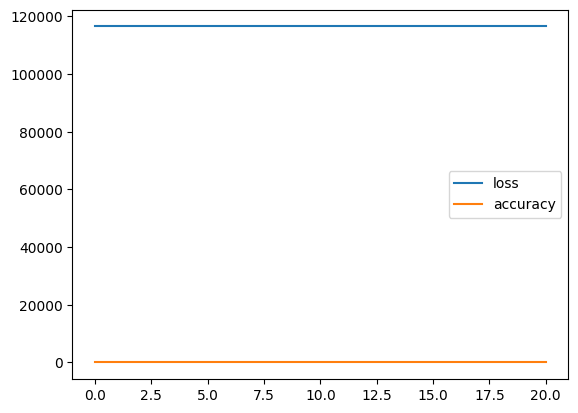

In [72]:
plt.plot(hist.history['val_loss'],label='loss')
plt.plot(hist.history['val_accuracy'],label='accuracy')
plt.legend()
plt.show()

In [90]:
pred=model.predict(x)

5/5 [==============================] - 0s 4ms/step


5/5 [==============================] - 0s 5ms/step


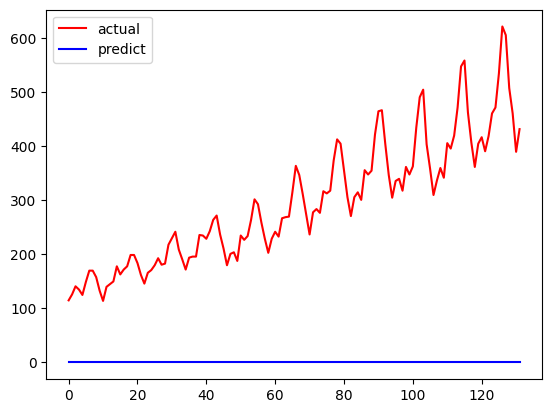

In [92]:
pred = model.predict(x)
plt.plot(y,'r',label='actual')
plt.plot(pred,'b',label='predict')
plt.legend()
plt.show()

In [93]:
path='/content/drive/MyDrive/python_basic/data/000080.csv'
df=pd.read_csv(path)
df

,Date,Open,High,Low,Close,Volumn,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolumn
0,2020-09-18,37200.0,37450.0,NaN,NaN,NaN,NaN,36850.0000,NaN,NaN,NaN
1,2020-09-17,37950.0,38150.0,NaN,NaN,NaN,NaN,37150.0000,NaN,NaN,NaN
2,2020-09-16,38500.0,38500.0,NaN,NaN,NaN,NaN,37950.0000,NaN,NaN,NaN
3,2020-09-15,37400.0,38700.0,NaN,NaN,NaN,NaN,38500.0000,NaN,NaN,NaN
4,2020-09-14,37700.0,37750.0,NaN,NaN,NaN,NaN,37300.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,2019-09-25,26350.0,26950.0,NaN,NaN,NaN,NaN,26127.5986,NaN,NaN,NaN
246,2019-09-24,26200.0,26500.0,NaN,NaN,NaN,NaN,25786.3799,NaN,NaN,NaN
247,2019-09-23,27000.0,27000.0,NaN,NaN,NaN,NaN,25542.6523,NaN,NaN,NaN
248,2019-09-20,26750.0,27150.0,NaN,NaN,NaN,NaN,26322.5806,NaN,NaN,NaN


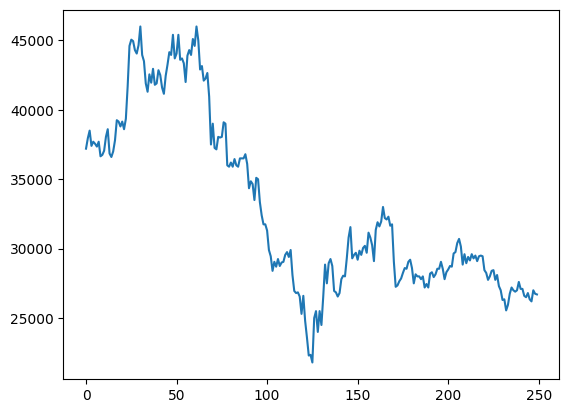

In [94]:
src=df['Open']
plt.plot(src)
plt.show()

In [101]:
x=[]
y=[]
src=df['Open']
n=len(src)
period=5
for i in range(n-period):
    x.append(src[i:i+period])
    y.append(src[i+period])
x=np.array(x)
y=np.array(y)

In [112]:
x

array([[37200., 37950., 38500., 37400., 37700.],
       [37950., 38500., 37400., 37700., 37550.],
       [38500., 37400., 37700., 37550., 37350.],
       ...,
       [26600., 26500., 26800., 26350., 26200.],
       [26500., 26800., 26350., 26200., 27000.],
       [26800., 26350., 26200., 27000., 26750.]])

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.metrics import r2_score

In [113]:
model=keras.Sequential()
model.add(Input(shape=(5,1)))
model.add(LSTM(3))

model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 3)                 60        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [114]:
es=keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
hist=model.fit(x_train, y_train,callbacks=[es],validation_split=0.2,epochs=500)

Epoch 1/500
5/5 [==============================] - 4s 213ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 1141532544.0000 - val_loss: 1080920448.0000
Epoch 3/500
5/5 [==============================] - 0s 13ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 6/500
5/5 [==============================] - 0s 18ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 8/500
5/5 [==============================] - 0s 17ms/step - loss: 1141532672.0000 - val_loss: 1080920448.0000
Epoch 9/500
5/5 [==============================] - 0s 14ms/step - loss:

In [2]:
path='/content/drive/MyDrive/python_basic/data/coin2020.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.candle_date_time_kst[95]

'2019-12-31T23:45:00'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
df.head()

,candle_date_time_kst,opening_price,high_price,low_price,trade_price
0,2019-12-31T00:00:00,8402000.0,8406000.0,8367000.0,8379000.0
1,2019-12-31T00:15:00,8379000.0,8379000.0,8360000.0,8365000.0
2,2019-12-31T00:30:00,8365000.0,8378000.0,8362000.0,8376000.0
3,2019-12-31T00:45:00,8377000.0,8383000.0,8354000.0,8359000.0
4,2019-12-31T01:00:00,8366000.0,8378000.0,8359000.0,8364000.0


In [4]:
x=[]
y=[]
src=df['opening_price']
n=len(src)
period=672
for i in range(n-period):
    x.append(src[i:i+period])
    y.append(src[i+period])
x=np.array(x)
y=np.array(y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.metrics import r2_score

model=keras.Sequential()
model.add(Input(shape=(672,1)))
model.add(LSTM(200))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 171,701
Trainable params: 171,701
Non-trainable params: 0
_________________________________________________________________


In [7]:
es=keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
hist=model.fit(x_train, y_train,callbacks=[es],validation_split=0.2,epochs=1000)

Epoch 1/1000
2308/2308 [==============================] - 2241s 970ms/step - loss: 1598600383561728.0000 - val_loss: 1614207757844480.0000
Epoch 2/1000
2308/2308 [==============================] - 2236s 969ms/step - loss: 1598601188868096.0000 - val_loss: 1614207757844480.0000
Epoch 3/1000
2308/2308 [==============================] - 2269s 983ms/step - loss: 1598599309819904.0000 - val_loss: 1614207757844480.0000
Epoch 4/1000
2308/2308 [==============================] - 2302s 997ms/step - loss: 1598601188868096.0000 - val_loss: 1614207757844480.0000
Epoch 5/1000
2308/2308 [==============================] - 2266s 982ms/step - loss: 1598599041384448.0000 - val_loss: 1614207757844480.0000
Epoch 6/1000
2308/2308 [==============================] - 2237s 969ms/step - loss: 1598600115126272.0000 - val_loss: 1614207757844480.0000
Epoch 7/1000
 885/2308 [==========>...................] - ETA: 20:50 - loss: 1594159521595392.0000

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-0c79eca83780>", line 2, in <cell line: 2>
    hist=model.fit(x_train, y_train,callbacks=[es],validation_split=0.2,epochs=1000)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages

TypeError: ignored